## The use of encode and decode functions in `crypto.py`

In [1]:
from crypto import *

In [2]:
encode("ProgrammingforDataScience", 'passcode123')

'ATc[VQRSz!zWQf8EdF9t{x_EY'

In [3]:
decode("ATc[VQRSz!z7Qf8EdF9t{x_EY", 'passcode123')

'ProgrammingForDataScience'

#### Test `ch_to_num`

In [4]:
test_cases_ch_to_num = [(' ',0), # first character in the target list
                        ('~',94), # last character in the target list
                        ('a',65)] # random character in between

In [5]:
for ch,num in test_cases_ch_to_num:
    assert ch_to_num(ch) == num, f'Expected {num} from test_cases_ch_to_num({ch})'
print('All tests passed!')

All tests passed!


#### Test `num_to_ch`

In [6]:
test_cases_num_to_ch = [(0,' '), # the smallest integer in the range
                        (65,'a'),# random integer in the range
                        (94,'~'),# largest integer in the range
                        (95,' '),# smallest positive integer out of the range
                        (160,'a'),# random positive integer out of the range
                        (189,'~'),# largest positive integer in the first round out of the range
                        (190,' '),# smallest positive integer in the second round out of the range
                        (-1,'~'), # largest negative integer out of the range
                        (-47,'P'),# random negative integer out of the range
                        (-95,' '),# smallest negative integer in the first round out of the range
                        (-96,'~'),# largest negative integer in the second round out of the range
                        (-142,'P'),# random negative integer in the second round out of the range
                        (-190,' ')]# largest negative integer in the third round out of the range

In [7]:
for num,ch in test_cases_num_to_ch:
    assert num_to_ch(num) == ch, f'Expected {ch} from test_cases_num_to_ch({num})'
print('All tests passed!')

All tests passed!


#### Test `encode`

In [8]:
test_cases_encode = [("ProgrammingforDataScience", "passcode123","ATc[VQRSz!zWQf8EdF9t{x_EY"), # passcode shorter than message
                     ("ProgrammingforDataScience", "1234567890passcode1234567890","a%#{(w%&#~XHcf(QYGdu|y$y|"), # passcode longer than message
                     ("I take ST101 to enhance my programming skills", "789passcode","`8.RMYs7DuuH8.`aYbLQSI|8'jadfSWWG%&#_IsgOYQR+")] # message and passcode contain char and numbers

In [9]:
for message,passcode,encrypt in test_cases_encode:
    assert encode(message,passcode) == encrypt, f'Expected {encrypt} from test_cases_num_to_ch({message,passcode})'
print('All tests passed!')

All tests passed!


#### Test `decode`

In [10]:
test_cases_decode = [("ATc[VQRSz!zWQf8EdF9t{x_EY","passcode123","ProgrammingforDataScience"),# match the three test cases above
                     ("a%#{(w%&#~XHcf(QYGdu|y$y|","1234567890passcode1234567890","ProgrammingforDataScience"),
                     ("`8.RMYs7DuuH8.`aYbLQSI|8'jadfSWWG%&#_IsgOYQR+","789passcode","I take ST101 to enhance my programming skills")]

In [11]:
for message,passcode,decrypt in test_cases_encode:
    assert encode(message,passcode) == decrypt, f'Expected {decrypt} from test_cases_num_to_ch({message,passcode})'
print('All tests passed!')

All tests passed!


## Success paradox

Load the data from data/movie.json

In [12]:
import json
import pandas as pd
import copy
f = open('../data/movie.json')
movie = json.load(f)

Check whether ids are unique for each actor in the dataset

In [13]:
def has_duplicates(seq):
    return len(seq) != len(set(seq))

for m in movie: 
    id_list = list(map(lambda a: a['id'], m['cast']))
    if has_duplicates(id_list):
        print('has duplicates')
        break

has duplicates


Create an actor `list` to extract all actors participating in at least one movie in the dataset (without repetition)

In [14]:
actor_list = {}
for m in movie:
    for actor in m['cast']:
        if actor['id'] not in actor_list:
            actor_list[actor['id']] = []

Create a `dict` of `list` to store a sequence of co-actors

In [15]:
co_actor_list = copy.deepcopy(actor_list)
for m in movie:
    for actor in m['cast']:
        for coactor in m['cast']: # iterate all actors appeared in the same movie
            if coactor['id'] != actor['id']: # coactor cannot be him/herself
                if coactor['id'] not in co_actor_list[actor['id']]:
                    co_actor_list[actor['id']].append(coactor['id'])

Create a `dict` of `list` of the number and the average revenue of the movies that each actor participated in

In [16]:
movie_number_and_reveune_list = copy.deepcopy(actor_list)
for m in movie:
    for actor in m['cast']:
        if movie_number_and_reveune_list[actor['id']]: # check whether the list is empty or not
            movie_number_and_reveune_list[actor['id']][0] += 1 # number of movies
            movie_number_and_reveune_list[actor['id']][1] += m['revenue'] # total revenue of movies
        else:
            movie_number_and_reveune_list[actor['id']] = [1,m['revenue']]
for actor,num_and_revenue in movie_number_and_reveune_list.items():
    avg_revenue = num_and_revenue[1]/num_and_revenue[0]
    movie_number_and_reveune_list[actor] = [num_and_revenue[0],avg_revenue] # replace total revenue by average revenue

Create a `dict` of `list` of the number and the average revenue of the movies that each actor's coactor participated in

In [17]:
coactors_movie_number_and_reveune_list={}
for actor,coactors in co_actor_list.items():
    total_movies = 0
    total_revenue = 0
    for coactor in coactors:
        total_movies += movie_number_and_reveune_list[coactor][0]
        total_revenue += movie_number_and_reveune_list[coactor][1]
    if len(coactors) != 0:
        coactors_movie_number_and_reveune_list[actor] = [total_movies/len(coactors),total_revenue/len(coactors)]
    else:
        coactors_movie_number_and_reveune_list[actor] = [0,0]

Convert `movie_number_and_reveune_list` and `coactors_movie_number_and_reveune_list` into pandas dataframes

In [18]:
actor_df = pd.DataFrame.from_dict(movie_number_and_reveune_list)
coactor_df = pd.DataFrame.from_dict(coactors_movie_number_and_reveune_list)
df_compare = actor_df < coactor_df
percentage_with_fewer_movies_than_coactors = df_compare.iloc[0].sum() / len(df_compare.columns)
percentage_with_fewer_revenue_than_coactors = df_compare.iloc[1].sum() / len(df_compare.columns)

In [19]:
percentage_with_fewer_movies_than_coactors

0.9215761705869422

In [20]:
percentage_with_fewer_revenue_than_coactors

0.712647468308053

IDs are used to represent each actor for two reasons. First, ids are more unique than names as it is less likely for two people to have the same ids than names. Using ids can check the result more accurately. Second, ids take less space than names since integers take less space than strings. Using ids improve the efficiency of the code.However, I assume that ids are more unique than names in this dataset even if I've checked that ids are not unique for each actors. 

"Success paradox" is observed since for about 92% of the actors, their co-actors are more "successful" than them in terms of the number of appearances in movies and for about 71% of the actors, their co-actors are more "successful" than them in terms of the average revenue. One assumption made during the analysis is assuming all 0 values truly represents 0 movie or 0 revenue. However, it's highly likely due to the incompleteness of data that there are some missing values in the dataset. The limitation of the analysis is some incomplete data will be included in the final percentage (i.e. those actors with 0 movie or 0 revenue may seem so due to incomplete data but is considered so and will definitely appear to have lower movies and revenue than their coactors. We can consider doing some data cleaning first to eliminate incomplete and inaccurate data and then do the analysis to improve the overall accuracy and reliability.

## Number Guessing Game

In [21]:
from number_guessing_game import *
from player import *
import pandas as pd

In [22]:
def sim_play(player_1, player_2, player_3, player_4,n):
    '''
    play the number guessing game n times
    Parameters:
    player_1: Player
    player_2: MinPlayer
    player_3: MiddlePlayer
    player_4: LearningPlayer
    n: int > 0, number of games to play
    '''
    num_guess_game = Num_Guessing_Game(player_1, player_2, player_3, player_4)
    for _ in range(n):
        num_guess_game.play()

In [23]:
player_1 = Player()
player_2 = MinPlayer()
player_3 = MiddlePlayer()
player_4 = LearningPlayer()
sim_play(player_1, player_2, player_3, player_4, 10000) # play the game 10000 times

Create a dataframe of 4 players' num guesses

In [24]:
df = pd.DataFrame({'random player': player_1.record(1000),'min player': player_2.record(1000),'middle player': player_3.record(1000),'learning player': player_4.record(1000)})

Calculate the summary stats of the 4 players

`random player`

In [25]:
df['random player'].mean()

7.391

In [26]:
df['random player'].median()

7.0

In [27]:
df['random player'].max()

16

In [28]:
df['random player'].min()

1

`min player`

In [29]:
df['min player'].mean()

50.109

In [30]:
df['min player'].median()

48.0

In [31]:
df['min player'].max()

100

In [32]:
df['min player'].min()

1

`middle player`

In [33]:
df['middle player'].mean()

5.804

In [34]:
df['middle player'].median()

6.0

In [35]:
df['middle player'].max()

7

In [36]:
df['middle player'].min()

1

`learning player`

In [37]:
df['learning player'].mean()

5.915

In [38]:
df['learning player'].median()

6.0

In [39]:
df['learning player'].max()

9

In [40]:
df['learning player'].min()

1

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of guesses made for players with different strategies')

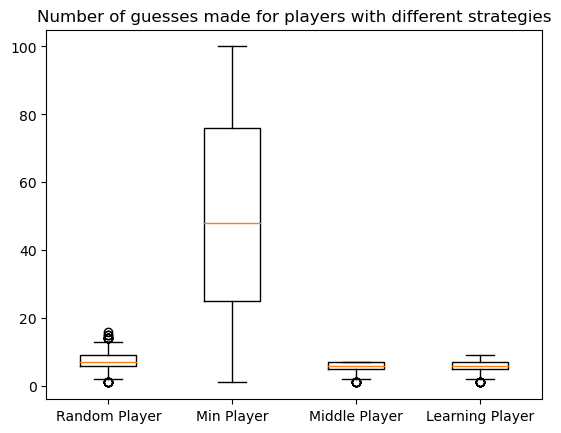

In [42]:
plt.boxplot(df,labels=['Random Player','Min Player','Middle Player','Learning Player'])
plt.title('Number of guesses made for players with different strategies')

Min Player is the player with the worst performace given both its mean and median shown in the graph is far higher than the other 3 players. Middle Player is the player with the best performace since it has the smallest dispersion and lowest max number to make the correct guess. 
Random Player's performace is the middle of the min and middle player as its average num is higher with some outliers.

I think learning player works because it has a performance between random player and middle player, suggesting that at first without experience, learning player may use more guesses to get the correct number, but gradually with experience, learnning player has better results which approaching the performance of the middle player, given the fact that the way middle player plays is the best strategy in the number guesses game (binary search). Learning player may improve its performance by using a more accurate and effective probability to perform learning strategies because the probability given may not be the optimal but a simplified one, so it may not help the player to learn well. It can also be seen from the record that there is no super clear learning trend shown in the record guesses of the learning player.